# Programa de Ingenería en Sistemas

### Asignatura Inteligencia Artificial
<p style="font-size:23px; color:gray; text-align:false;">

<b>Grupo:</b> IS08N1.


</p>

<div style="display: flex; justify-content: space-between; align-items: center">
  <img src="https://github.com/wilmanAQ/Inteligencia_Artificial/blob/IA/icono_unipacifico.jpeg?raw=1" width="100">
  <img src="https://github.com/wilmanAQ/Inteligencia_Artificial/blob/IA/icono_PIS.png?raw=1" width="270">
</div>

<b>MEDIDAS DE TENDENCIA CENTRAL Y REGRESION LIENEAL- </b>Programa de Ingenería de Sistemas<b>.

<b>Created by:</b> Msc. Wilman Andrés Quiñonez V.

# Haciendo el setup del entorno

Debajo importaremos e instalaremos todas las librerías necesarias para ese módulo:

In [1]:
import sys
print(sys.executable)


f:\PERIODO_2025_2\INTELIGENCIA_ARTIFICIAL\AI_GITHUG\Inteligencia_Artificial\notebook\.venv\Scripts\python.exe


In [2]:
!{sys.executable} -m pip install scipy



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import stats


In [4]:
!mkdir %userprofile%\.kaggle

Ya existe el subdirectorio o el archivo C:\Users\Wilmar\.kaggle.


In [ ]:
# FORMA DE CARGAR LOS DATOS

# Lee el archivo desde el directorio local
#df_kaggle = pd.read_csv('salary_data.csv', sep=';')

In [5]:
# FORMA DE LOS DATOS DESDE KAGGLE
# 1. Instala la API de Kaggle
!pip install kaggle

# 2. Configura tus credenciales de Kaggle:
# - Ve a tu cuenta de Kaggle -> Account -> API -> Create New API Token
# - Descarga el archivo kaggle.json
# - En Windows, colócalo en: C:\Users\<usuario>\.kaggle\kaggle.json

# 3. Descarga el dataset
!kaggle datasets download -d micheldc55/anual-salary-reports-survey

# 4. Descomprime y lee el archivo
import pandas as pd
df_kaggle = pd.read_csv('salary_data.csv', sep=';')


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: f:\PERIODO_2025_2\INTELIGENCIA_ARTIFICIAL\notbook\.venv\Scripts\python.exe -m pip install --upgrade pip


Dataset URL: https://www.kaggle.com/datasets/micheldc55/anual-salary-reports-survey
License(s): unknown
anual-salary-reports-survey.zip: Skipping, found more recently modified local copy (use --force to force download)


# Introducción a la estadística en el marco de la Inteligencia Artificial y Ciencia de Datos

En esta versión del curso veremos un repaso sobre qué es la estadística y qué función cumple en la ciencia de datos actual. Muchas veces escuchamos los términos de Machine Learning, Inteligencia Artificial o Deep Learning y olvidamos que por debajo todos estos conceptos tienen una implementación matemático-estadística. Pero la estadística no está solo presente en este aspecto, sino que también nos permite cuantificar la incertidumbre de nuestras predicciones y de nuestros experimentos.

En este módulo utilizaremos librerías de visualización (matplotlib) a pesar de que aún no las hemos visto. Cuando vean las funciones de tipo "plt.(...)" sepas que son librerías de visualización, y que las veremos en detalle más adelante!

Para realizar algunos análisis estadísticos utilizaremos el dataset de Kaggle de [Anual Salary reports survey](https://www.kaggle.com/datasets/micheldc55/anual-salary-reports-survey) o algunos datasets fabricados para este propósito.

## Estadística Descriptiva

"Básicamente, se trata de una rama de la estadística que, como su nombre lo señala, se encarga de describir de forma cuantitativa la información. Es decir, su función consiste en recopilar, estructurar, tabular, organizar y procesar los datos para inferir comportamientos o características de un determinado grupo. 

La estadística descriptiva se utiliza con el objetivo de comprender ciertos fenómenos y predecir acontecimientos, a partir de la información que almacena, resume y organiza en tablas, gráficos u otros recursos." [referencia aqui](https://www.crehana.com/blog/data-analitica/que-es-estadistica-descriptiva/)

En este curso estudiaremos los recursos básicos que nos provee esta ciencia para el análisis de datos, y cómo podemos utilizarla para definir experimentos, tamaños de muestra y medir la incertidumbre de un proceso.

## Medidas de tendencia central y dispersión

El objetivo de estas métricas será ofrecernos un "resumen" de cómo se comportan globalmente nuestros datos, ya se en términos de su medida "central" o de cómo se dispersan respecto de ella. Algunos casos típicos de medidas de tendencia o dispersión son:

- Media (promedio)
- Mediana
- Moda
- Desviación estándar (desv. típica)
- Rango (dispersión)
- Etc.

### Media

Comenzaremos por la más conocida por todos, la media o promedio. El nombre formal de esta medida es el de **media aritmética**, ya que existen otros tipos de medias basadas en otras operaciones. La media aritmética es simplemente la suma de todos los elementos de nuestra muestra, dividido entre la cantidad de elementos de la muestra.

Por ejemplo, si tenemos una lista de 6 elementos [1, 2, 3, 4, 5, 6], el promedio de la lista será la suma total de la lista (21) partido entre la cantidad de elementos de la lista (6). Por lo tanto el promedio será de 3,5. Una implementación sencilla de Python para calcular el promedio de una lista es:

```python
def promedio_lista(lista):
    return sum(lista) / len(lista)
```

In [22]:
def promedio_lista(lista):
    return sum(lista) / len(lista)

lista1 = [1, 2, 3, 4, 5, 6, 2, 4, 6, 8, 9, 10]
media = promedio_lista(lista1)

print(f'El promedio de la lista: {lista1} es: {media}')

El promedio de la lista: [1, 2, 3, 4, 5, 6, 2, 4, 6, 8, 9, 10] es: 5.0


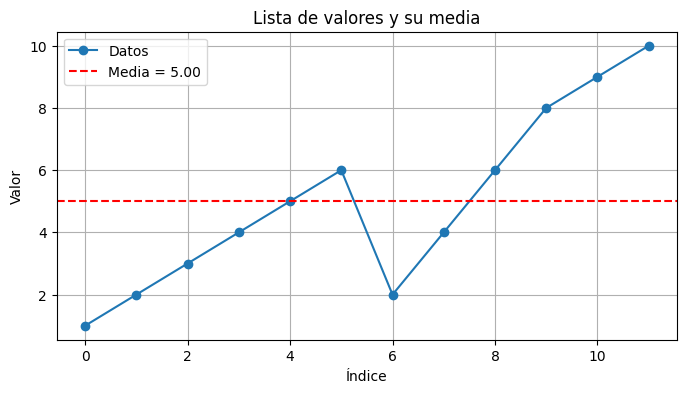

El promedio de la lista: [1, 2, 3, 4, 5, 6, 2, 4, 6, 8, 9, 10] es: 5.0


In [23]:
import matplotlib.pyplot as plt

def promedio_lista(lista):
    return sum(lista) / len(lista)

lista1 = [1, 2, 3, 4, 5, 6, 2, 4, 6, 8, 9, 10]
media = promedio_lista(lista1)

plt.figure(figsize=(8,4))
plt.plot(lista1, 'o-', label='Datos')
plt.axhline(media, color='r', linestyle='--', label=f'Media = {media:.2f}')
plt.title('Lista de valores y su media')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

print(f'El promedio de la lista: {lista1} es: {media}')

La fórmula matemática para la media aritmética se puede ver debajo, pero es una fórmula que escrita parece compleja, pero en la práctica se calcula de la forma que vimos antes.



Existen otras implementaciones mejores y peores para calcular la media. Se incluyen debajo para su referencia, pero cualquiera de ellas cumplirá con el objetivo. Verán que algunas son más claras, otras menos, algunas son más rápidas, otras menos. La elección de un método u otro dependerá de lo que queramos hacer con nuestra solución.

```python
# Opcion con bucles (lenta)
def promedio_lista_for(lista):
    sum_total = 0
    
    for elem in lista:
        sum_total += elem
    
    return sum_total / len(lista)
    
# Otra opcion con numpy:
def promedio_lista_np(lista):
    return np.mean(lista)
```

Y hay muchas más alternativas que no cubriremos. La idea es que vean que se pueden utilizar distintas implementaciones que llegan al mismo resultado.

In [24]:
def promedio_lista_for(lista):
    sum_total = 0
    
    for elem in lista:
        sum_total += elem
    
    return sum_total / len(lista)
    
def promedio_lista_np(lista):
    return np.mean(lista)

print(promedio_lista_for(lista1), promedio_lista_np(lista1), promedio_lista(lista1))

5.0 5.0 5.0


In [25]:
df_kaggle[[ 'income',"age"]]

,income,age
0,86519.608537,45
1,83085.864980,30
2,82606.214973,22
3,81551.229988,36
4,79593.253224,51
...,...,...
99995,15000.000000,38
99996,15000.000000,20
99997,15000.000000,32
99998,15000.000000,21


In [26]:
df_kaggle['income'].mean()

np.float64(40412.51647145783)

In [27]:
promedio_lista(df_kaggle['income'])

40412.51647145783

In [28]:
df_kaggle['income'].describe()

count    100000.000000
mean      40412.516471
std       10830.793058
min       15000.000000
25%       33354.667673
50%       40097.697667
75%       46950.875508
max      285342.491970
Name: income, dtype: float64

### Mediana

La mediana es una medida alternativa de tendencia central de nuestros datos. Básicamente la mediana es el punto que divide nuestros datos en 2 partes iguales. En caso de que el número de datos sea par (no existe un valor que divide al dataset en 2), la mediana es la media de los dos puntos centrales. Por lo tanto, algo que debemos tener en cuenta es que para calcular la mediana siempre debemos ordenar los datos, para poder tomar el punto central. Lo veremos mejor con un ejemplo:

Imaginemos que queremos calcular la media y la mediana de esta lista: [1, 2, 3, 4 ,5 ,6, 7, 8, 9, 100] --> ¿Cuál sería el valor "central" de esta lista intuitivamente?

#### Ventajas:

El valor medio (promedio) de la lista es 14,5. Esto debería llamarnos la atención, ya que todos nuestros datos menos uno son menores a 10, pero en cambio nuestra media es mayor al 90% de nuestros valores. Esto es porque la media aritmética es un valor **sensible a valores atípicos (outliers)**. Generalmente cuando estimamos tendencia central, nos interesa entender el comportamiento general de los datos, y la media en este caso se está viendo afectada por uno solo.

La mediana es **menos sensible a outliers**, porque solamente intentará separar las magnitudes de nuestros datos en dos conjuntos de igual tamaño. No está utilizando la magnitud de nuestros datos para encontrar el punto medio (aunque sí para calcular su valor, obviamente). Entonces en casos en los que vemos una **presencia muy fuerte de valores atípicos** lo recomendable es **utilizar la mediana** como medida central, en lugar de la media.

#### Implementación:

Veamos una implementación sencilla de la mediana y comparemos los resultados de nuestro test. Tener en cuenta que ahora debemos tener **dos situaciones**:

1) La cantidad de elementos es impar y tomamos el punto medio de la lista.

2) La cantidad de elementos es par y tomamos el promedio de los dos "puntos medios" de la lista.

In [37]:
lista2 = [1, 2, 3, 4 ,5 ,6, 7, 8, 9, 100]

In [38]:
def mediana_lista(lista):
    lista_ordenada = lista.sort()
    len_lista = len(lista)
    
    ## Contemplamos los dos casos:
    # Caso 1: La lista tiene un número impar de elementos
    if len_lista % 2 != 0: 
        idx = int(len_lista / 2)
        return lista[idx]
    
    else:
        idx = int(len_lista / 2)
        return (lista[idx] + lista[idx - 1]) / 2

In [39]:
print(f'El promedio de la lista2 es: {promedio_lista(lista2)}')
print(f'La mediana de la lista2 es: {mediana_lista(lista2)}')

El promedio de la lista2 es: 14.5
La mediana de la lista2 es: 5.5


Ver que la mediana es bastante mejor en este caso, aunque tener en cuenta que es un caso extremo, en la práctica no suele ser tan fácil saber si debemos utilizar una u otra.

In [40]:
mediana_lista(df_kaggle['income'].to_list())

40097.69766728312

### Moda

La moda es una medida que refleja cuál es el valor que más se repite dentro de un conjunto. Los conjuntos pueden tener una moda, o más de una, como en la imagen que se puede ver debajo. La imagen que se incluye muestra una distribución trimodal (que tiene 3 modas). Esto no es frecuente, pero debemos saber que existe.

<img src="imagenes\moda.png" width="500px" height="500px">



#### Implementación

De los últimos valores que vimos, la moda es seguramente el menos utilizado, así que simplemente veremos una implementación sencilla que solamente devuelve la menor moda (en caso de que haya múltiples) y pasaremos a la próxima medida:

In [41]:
def moda_lista(lista):
    valores_unicos = set(lista)
    base = 0
    
    for valor in valores_unicos:
        apariciones = lista.count(valor)
        if apariciones > base:
            moda = valor
            base = apariciones
            
    return moda

lista3 = [1, 1, 2, 2, 2, 2, 3, 3, 3, 7, 9, 9]
moda_lista(lista3)

2

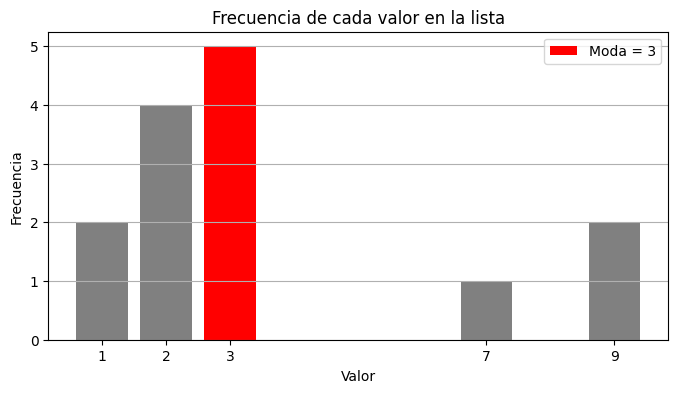

In [43]:
import matplotlib.pyplot as plt

def moda_lista(lista):
    valores_unicos = set(lista)
    base = 0
    for valor in valores_unicos:
        apariciones = lista.count(valor)
        if apariciones > base:
            moda = valor
            base = apariciones
    return moda

lista3 = [1, 1, 2, 2, 2, 2, 3, 3, 3,3,3 , 7, 9, 9]
moda = moda_lista(lista3)

# Calcular frecuencias
valores = sorted(set(lista3))
frecuencias = [lista3.count(v) for v in valores]

plt.figure(figsize=(8,4))
bars = plt.bar(valores, frecuencias, color=['red' if v == moda else 'gray' for v in valores])
plt.title('Frecuencia de cada valor en la lista')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.xticks(valores)
plt.grid(axis='y')
plt.legend([bars[valores.index(moda)]], [f'Moda = {moda}'], loc='upper right')
plt.show()

### Desviación Estándar:

"En estadística, la **desviación típica** (...) es una medida que se utiliza para cuantificar la **variación o la dispersión** de un conjunto de **datos numéricos**. Una desviación estándar baja indica que la mayor parte de los datos de una muestra tienden a estar agrupados cerca de su media (también denominada el valor esperado), mientras que una desviación estándar alta indica que los datos se extienden sobre un rango de valores más amplio." [referencia aqui](https://es.wikipedia.org/wiki/Desviaci%C3%B3n_t%C3%ADpica)

La desviación estándar es una medida muy útil para cuantificar que tan dispersos se encuentran los valores de un conjunto de datos respecto de la media de los datos. Lo que mide es la media de las distancias al cuadrado entre todos los puntos y la media de los datos. Luego se calcula la raíz cuadrada de ese resultado para obtener la desviación estándar. Esto puede verse en la imagen debajo. Básicamente llamaremos **varianza** al promedio de las diferencias con la media al cuadrado, y **desviación estándar** a la raíz cuadrada de la varianza.

<img src="imagenes\varianza.png" width="500px" height="500px">




Lo importante para nosotros es que cuanto mayor sea la desviación estándar, tendremos una distribución de datos más dispersa.

#### Ventajas:

La desviación estándar tiene una ventaja sustancial respecto a la varianza como medida de la dispersión, y es que está calculado en las mismas unidades que los datos. O sea que si calculamos la desviación estándar de un conjunto de precios en dólares, el resultado de la desviación estará en dólares. Esto es muy útil como herramienta para cuantificar, ya que estamos comparando "manzanas con manzanas".

#### Implementación:

Vamos a generar una implementación de la desviación estándar para nuestro caso. Primero algo que no hemos mencionado: En matemática podemos calcular una raíz elevando el número que queremos al inverso de la raíz que queremos calcular. Así que la raíz cuadrada de 4 es igual a 4 elevado a 1/2 (o 0.5). Esto es muy útil para calcular raíces, porque Python no tiene una función que lo haga directamente, como sí la hay en librerías como **math**. Además, esto nos permite calcular rápidamente cualquier raíz del ordern que queramos.

```python
# Podemos elevar un número en Python usando el símbolo **:
# Por ejemplo 2 al cubo es 8. En python: 2 ** 3
2 ** 3 

```

In [44]:
2 ** 3

8

In [45]:
def desviacion_est(datos):
    media = np.mean(datos)
    n = len(datos)
    
    dist_cuadradas = 0
    
    for dato in datos:
        dist_cuadradas += (dato - media) ** 2
        
    return (dist_cuadradas / (n - 1)) ** 0.5

In [46]:
datos = [1, 2, 3, 5, 8, 9, 11, 12]

desviacion_est(datos)

np.float64(4.2067123233504535)

Verificamos el resultado utilizando una función de la librería "statistics" que calcula este valor... Funciona!!

In [47]:
import statistics

statistics.stdev(datos)

4.2067123233504535

### Rango

Una medida bastante rápida de la dispersión es el rango de los datos. Con esta métrica calculamos la distancia entre el valor máximo y el mínimo de la muestra de datos que estamos utilizando. Es una medida bastante intuitiva de la dispersión (¿cuanto cubren mis datos?).

#### Ventajas:

- Intuitiva
- Rápida de calcular

El problema es que no es una métrica muy informativa respecto de la dispersión cerca de donde están los valores más frecuentes de nuestra distribución de datos. Otro problema es que es extremadamente sensible a outliers.

#### Implementación

```python
def rango_lista(datos):
    return (max(datos) - min(datos))
```

In [ ]:
def rango_lista(datos):
    return (max(datos) - min(datos))

lista4 = [1, 5, 8, 9, -1, 104, 11]
rango_lista(lista4)

103

Vamos a generar un conjunto de 50 datos aleatorios con distribución normal utilizando la librería NumPy. Qué rango tienen nuestros datos?

In [ ]:
datos_rand = np.random.randn(50)
print(datos_rand)
print(f'El rango de datos_rand es: {rango_lista(datos_rand)}')

[ 0.33203194  0.09709402 -0.26371369 -1.38887511  0.83643128  0.96334412
  0.32137312  1.63982765  1.26759009  1.44044843 -1.82744907 -0.14785864
 -0.3620456   0.20198088 -0.59076383 -0.51978161  1.33532385  0.70314482
  0.55337889 -0.78838456  1.1298162  -0.56722635  2.12928299 -1.66485226
 -0.21030101 -0.29549182 -0.91097701 -0.6864567  -0.81319968 -0.55362964
 -0.42390503 -0.62321505 -0.53133622 -0.53368858  0.21698106  1.04490525
 -0.12570839  1.17784624  0.04399532  0.8309774   0.34908895  1.12619008
  0.86124944 -0.29046836  1.26857252 -0.280209    1.42740213 -1.21353451
 -0.4870425   0.62919871]
El rango de datos_rand es: 3.9567320580294374


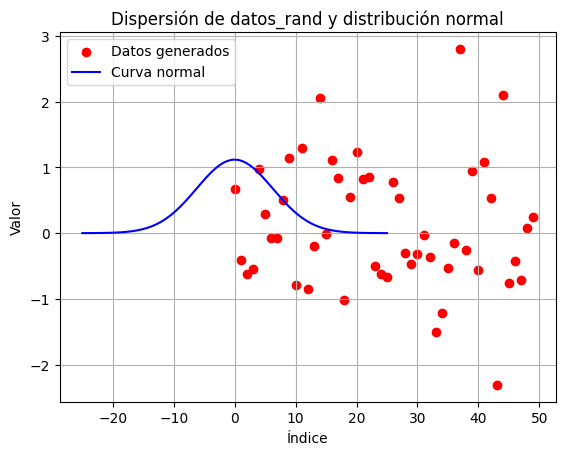

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generar datos aleatorios con distribución normal estándar
datos_rand = np.random.randn(50)

# Graficar dispersión de los datos
plt.scatter(range(len(datos_rand)), datos_rand, color="red", label="Datos generados")

# Graficar la distribución normal teórica
x = np.linspace(-4, 4, 200)
y = norm.pdf(x, 0, 1)  # Normal estándar (media=0, sigma=1)
plt.plot(x * (len(datos_rand) / 8), y * max(datos_rand), color="blue", label="Curva normal")

plt.title("Dispersión de datos_rand y distribución normal")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()


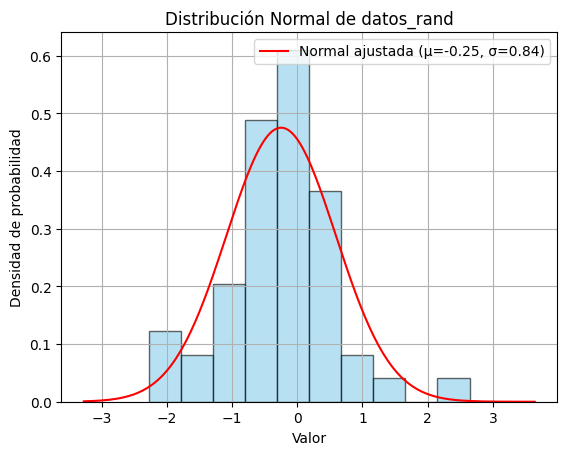

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generar datos aleatorios
datos_rand = np.random.randn(50)

# Calcular media y desviación estándar de los datos
mu, sigma = np.mean(datos_rand), np.std(datos_rand)

# Rango de valores para graficar la curva
x = np.linspace(min(datos_rand)-1, max(datos_rand)+1, 200)
y = norm.pdf(x, mu, sigma)

# Histograma de los datos
plt.hist(datos_rand, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Curva de distribución normal ajustada
plt.plot(x, y, 'r-', label=f'Normal ajustada (μ={mu:.2f}, σ={sigma:.2f})')

plt.title("Distribución Normal de datos_rand")
plt.xlabel("Valor")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()


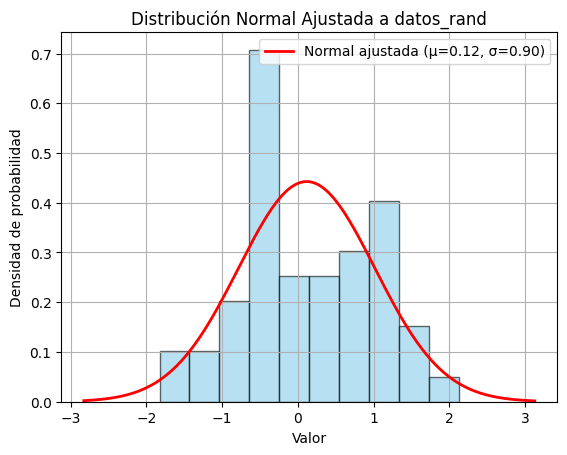

Media: 0.1165, Desviación estándar: 0.9013, Rango: 3.9567


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Tus datos ya generados
datos_rand = np.array([ 0.33203194,  0.09709402, -0.26371369, -1.38887511,  0.83643128,  
  0.96334412,  0.32137312,  1.63982765,  1.26759009,  1.44044843, 
 -1.82744907, -0.14785864, -0.3620456 ,  0.20198088, -0.59076383, 
 -0.51978161,  1.33532385,  0.70314482,  0.55337889, -0.78838456, 
  1.1298162 , -0.56722635,  2.12928299, -1.66485226, -0.21030101, 
 -0.29549182, -0.91097701, -0.6864567 , -0.81319968, -0.55362964, 
 -0.42390503, -0.62321505, -0.53133622, -0.53368858,  0.21698106, 
  1.04490525, -0.12570839,  1.17784624,  0.04399532,  0.8309774 , 
  0.34908895,  1.12619008,  0.86124944, -0.29046836,  1.26857252, 
 -0.280209  ,  1.42740213, -1.21353451, -0.4870425 ,  0.62919871])

# Calcular parámetros estadísticos
mu, sigma = np.mean(datos_rand), np.std(datos_rand)

# Rango de valores para la curva normal
x = np.linspace(min(datos_rand)-1, max(datos_rand)+1, 200)
y = norm.pdf(x, mu, sigma)

# Histograma normalizado de los datos
plt.hist(datos_rand, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Curva de distribución normal ajustada
plt.plot(x, y, 'r-', linewidth=2, label=f'Normal ajustada (μ={mu:.2f}, σ={sigma:.2f})')

# Personalización
plt.title("Distribución Normal Ajustada a datos_rand")
plt.xlabel("Valor")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

print(f"Media: {mu:.4f}, Desviación estándar: {sigma:.4f}, Rango: {np.ptp(datos_rand):.4f}")


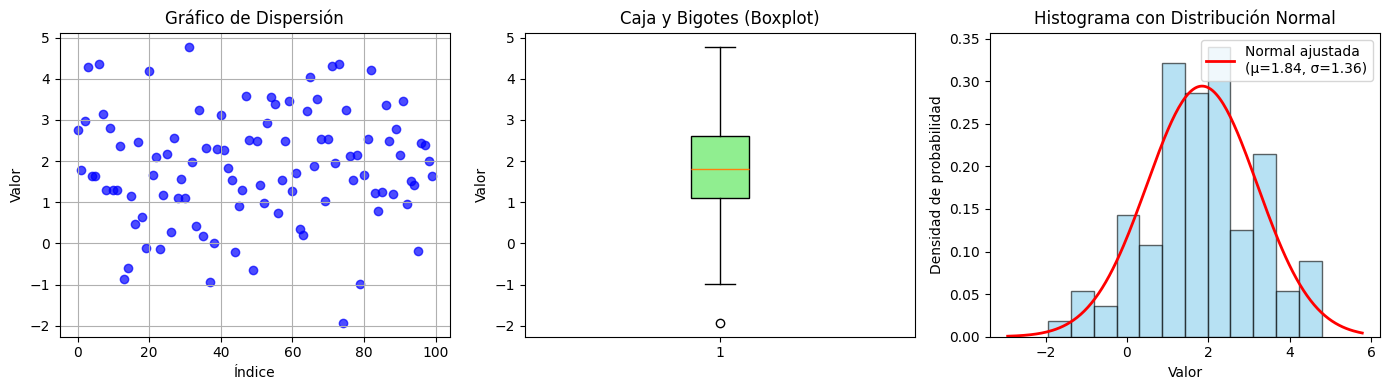

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generar datos aleatorios con distribución normal
np.random.seed(42)  # semilla para reproducibilidad
datos = np.random.randn(100) * 1.5 + 2   # Normal con media=2, sigma=1.5

# --- 1. Gráfico de dispersión ---
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.scatter(range(len(datos)), datos, color="blue", alpha=0.7)
plt.title("Gráfico de Dispersión")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.grid(True)

# --- 2. Boxplot ---
plt.subplot(1,3,2)
plt.boxplot(datos, vert=True, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Caja y Bigotes (Boxplot)")
plt.ylabel("Valor")

# --- 3. Histograma + Distribución Normal ---
plt.subplot(1,3,3)
mu, sigma = np.mean(datos), np.std(datos)
x = np.linspace(min(datos)-1, max(datos)+1, 200)
y = norm.pdf(x, mu, sigma)

plt.hist(datos, bins=12, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.plot(x, y, 'r-', linewidth=2, label=f'Normal ajustada\n(μ={mu:.2f}, σ={sigma:.2f})')
plt.title("Histograma con Distribución Normal")
plt.xlabel("Valor")
plt.ylabel("Densidad de probabilidad")
plt.legend()

plt.tight_layout()
plt.show()


### Sesgo y Kurtosis

El sesgo de una distribución mide la **asimetría de la distribución despecto de la media**. Esto es muy frecuente en conjuntos de datos o distribuciones que están acotados por uno de los lados. Uno muy frecuente es el de **ingresos**. Si miramos una distribución de ingresos, es decir cual es la frecuencia con la que las personas tienen un sueldo de X en una población, veremos algo interesante. Para calcular el sesgo se suele utilizar el [coeficiente de Fisher o el de Pearson](https://www.probabilidadyestadistica.net/asimetria-y-curtosis/)
 
La distribución de ingresos está acotada, ya que nadie puede tener ingresos negativos, pero no hay un límite superior para el valor de los ingresos, y suelen aparecer personas con ingresos "outliers". Esto por convención se conoce como asimetría positiva (ver imagen).

El sesgo es algo de lo que no se habla mucho en los modelos de Machine Learning, pero es algo que debemos contemplar. **Muchas de las implementaciones de ML toman como hipótesis que los datos tienen distribución normal**, y la distribución normal por definición tiene sesgo cero, entonces si alimentamos modelos de ML con distribuciones muy sesgadas, no funcionarán bien.

Existen técnicas para la corrección de sesgo como los métodos logarítmicos y exponenciales. [Aqui tienen un excelente artículo si les interesa profundizar en el tema](https://towardsdatascience.com/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94).

<img src="imagenes\imag1.png" width="800px" height="300px">

La **Kurtosis** es una medida de qué tan acumulados están nuestros datos alrededor de la media. La kurosis también se conoce como apuntamiento y cuanto mayor sea su valor, diremos que los valores estarán más concentrados alrededor de la media. La kurtosis de la distribución normal tiene un valor de **3**, y por eso verán que se suele restar 3 de las medidas de kurtosis (como si estuvieramos midiendo el "exceso" de kurtosis respecto de la distribución normal). [Aquí pueden ver cómo se calcula la kurtosis](https://www.probabilidadyestadistica.net/asimetria-y-curtosis/).

<img src="imagenes\imag2.png" width="800px" height="300px">

# Estadística Inferencial

"La estadística inferencial es una parte de la estadística que comprende los métodos y procedimientos que por medio de la inducción determina propiedades de una población estadística, a partir de una parte de esta. Su objetivo es obtener conclusiones útiles para hacer razonamientos deductivos sobre una totalidad, basándose en la información numérica dada por la muestra.

Se dedica a la generación de los modelos y predicciones asociadas a los fenómenos en cuestión teniendo en cuenta la aleatoriedad de las observaciones. Se usa para modelar patrones en los datos y extraer inferencias acerca de la población bajo estudio." [definición completa aquí](https://es.wikipedia.org/wiki/Estad%C3%ADstica_inferencial)

Como su nombre lo dice, la estadística inferencial nos permite aprender propiedades de la población que queremos estudiar, sin tener que medir cada uno de los elementos de la población. Imaginemos que queremos saber cual es la altura media de los hombres de entre 18-30 años, ¿es razonable esperar que se tomen medidas de **todos los hombres de entre 18-30 años** en el mundo? Parece un poco disparatado.

La inferencia estadística nos permite obtener pistas o aproximaciones de este comportamiento a partir del comportamiento de un subconjunto de ésta. Por ejemplo, en el caso de la altura media, podríamos tomar la altura de 200 hombres de entre 18-30 en cada uno de los 5 continentes, e intentar "estimar" cual sería la altura promedio de todos los hombres de este grupo, a partir de esa medida en un subgrupo del total.

### Distribución normal y el Teorema del límite central

Un tema muy frecuente cuando se habla de estadística es la distribución Gaussiana o normal. Esta distribución tiene una forma de campana en la que encontramos la mayoría de los valores de la distribución concentrados alrededor de la media. Es una función **simétrica** y **unimodal**. Muchas veces escucharemos que muchas cosas tienen una distribución que se puede modelar como una distribución normal, lo cual es **falso** en su mayoría. Esta confusión surge de un resultado muy importante en la estadística, conocido como el **Teorema del Límite Central**.

<img src="imagenes\imag3.png" width="800px" height="350px">

La distribución normal se caracteriza por estar centrada en la **media**. Existe una distribución normal "unitaria" o "estándar" que tiene media 0 y desviación estándar 1, que es la distribución básica de la estadística inferencial. Si observamos, la distribución normal tiene una propiedad interesante, y es que la media, mediana y la moda coinciden.

#### Teorema del Límite Central

Y si no es cierto que muchas cosas tienen distribución normal? Para qué la utilizamos? **La distribución normal es la base de la estadística inferencial!!** Simplemente que no lo es porque la mayoría de las cosas se comporten como una distribución normal, sino porque se puede demostrar que la distribución de las medias de todas las distribuciones tienen a la distribución normal si la muestra es suficientemente grande!

Este resultado es muy potente y es la base de los tests de hipótesis que utilizaremos para determinar el comportamiento de nuestra población a partir de la información que obtenemos de una o varias muestras.

Debajo utilizaremos la función np.random.randn() para generar una muestra de 5000 puntos obtenidos de una distribución normal estándar (media cero y desviación estándar 1).

(array([1.400e+01, 6.000e+01, 1.460e+02, 4.460e+02, 7.610e+02, 1.008e+03,
        1.026e+03, 8.050e+02, 4.430e+02, 2.120e+02, 5.600e+01, 2.000e+01,
        2.000e+00, 1.000e+00]),
 array([-3.2146555 , -2.68387168, -2.15308787, -1.62230406, -1.09152025,
        -0.56073644, -0.02995262,  0.50083119,  1.031615  ,  1.56239881,
         2.09318263,  2.62396644,  3.15475025,  3.68553406,  4.21631787]),
 <BarContainer object of 14 artists>)

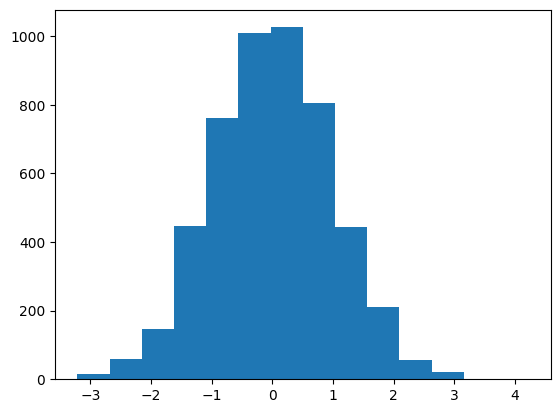

In [25]:
np.random.seed(4)

y = np.random.randn(5000)
plt.hist(y, bins=14)

### Otras distribuciones

También existen otras distribuciones que nos permiten modelar fenómenos utilizando otras expresiones matemáticas. Veremos que hay dos tipos de distribuciones: **continuas**, que responden a una variable numérica que puede tomar cualquier valor, o **discretas**, que responden a una variable que solo puede tomar un número finito de valores posibles.

No veremos estas distribuciones en detalle, pero se incluyen debajo algunas de las distribuciones más utilizadas y una breve explicación de para qué se utilizan o qué intentan medir, aunque pueden leer más sobre esto [aquí](https://keepcoding.io/blog/tipos-distribuciones-estadistica/):

- Continuas:
    - Uniforme: Mide la probabilidad de obtener un resultado, cuando todos los resultados tienen la misma probabilidad de ocurrir.
    - Chi-cuadrado: Es una curva con k grados de libertad que a medida que k crece se "degrada" a la distribución normal. Se utiliza mucho en tests estadísticos para medir la bondad de ajuste de una distribución a la estimada y para medir si dos variables aleatorias son independientes.
    - Exponencial: (ver Poisson) Modela el tiempo que transcurrirá entre dos eventos que tienen distribución de Poisson.
    - Student: La distribución t de Student es una distribución de probabilidad que surge del problema de estimar la media de una población que tiene distribución normal cuando el tamaño de la muestra es pequeño y la desviación estándar poblacional es desconocida.
    
- Discretas:
    - Bernoulli: Dada la probabilidad de que suceda un evento, modela la frecuencia con la que ocurrirá cada uno de los eventos.
    - Binomial: Generalización de Bernoulli. Modela N eventos independientes, cada uno con una probabilidad p de suceder
    - Poisson: Esta distribución expresa la probabilidad de que un número de eventos dado (con distribuciones binomiales) ocurra en un intervalo de tiempo (o espacio) fijo si los eventos ocurren con una frecuencia constante y son independientes (no dependen de cuándo ocurrió el último evento).

## Correlación

La correlación es una medida entre dos variables que cuantifica **cómo se comporta una cuando la otra cambia**. Existen muchas maneras de medir correlación, y sobre todo debemos tener mucho cuidado para saber qué tipo de correlación estamos midiendo, ya que muchas veces obtendremos un resultado que no tiene un nivel de correlación bueno, pero existe dependencia entre las variables. Esto es muy común cuando existe dependencia no lineal entre las variables!

Todas las medidas de correlación tienen el mismo principio de funcionamiento:
- Correlación positiva implica que cuando una variable crece, la otra también lo hace.
- Correlación negativa implica que cuando una variable creca, la otra disminuye.
- Correlación neutra implica que no se observa una relación de dependencia entre el comportamiento de ambas variables (**importante:** no se observa dependencia basado en el tipo de correlación que estamos midiendo!)

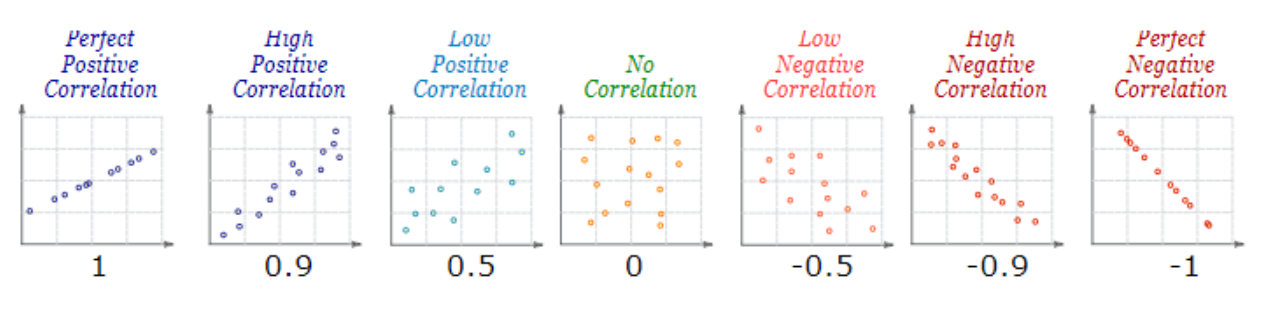

Podemos calcular la correlación entre dos o más variables utilizando NumPy con la función corrcoef, o utilizando el método .corr() que provee Pandas. Como ya tenemos cargado el dataframe de pandas con los datos de salarios anuales, utilizaremos éste último para medir la correlación entre la edad de las personas y sus ingresos anuales. Una observación importante es que todas las variables correlan al 100% con ellas mismas, por lo que solo debemos mirar los cruces entre ambas variables.

In [26]:
df_kaggle[['income', 'age']].corr()

,income,age
income,1.000000,0.464433
age,0.464433,1.000000


La correlación entre income y age es baja positiva, lo que quiere decir que cuando la edad aumenta se observa una tendencia al aumento de los ingresos también.

## Covarianza

La covarianza es una medida que indica la fuerza de la correlación entre dos variables respecto de su media. Podríamos decir que la correlación es una medida adimensional (o escalada) de la covarianza. Dicho de otra forma, la covarianza es sensible a la escala en la que se calcula, si las unidades son más grandes, los valores de covarianza serán más grandes, mientras que la correlación se mantendrá igual. Un valor de covarianza de cero indica que ambas variables son completamente independientes.

El coeficiente de correlación más utilizado en la práctica es el de Pearson, que calcula la correlación como la covarianza entre dos variables dividido entre el producto de las desviaciones estándar de cada variable.

Podemos calcular la covarianza entre dos variables usando la función np.cov(). Cuidado! Si utilizamos columnas de DataFrames, debemos trasponer el resultado para obtener la matriz de covarianza!

In [27]:
df_kaggle[['income','age']].values

array([[8.65196085e+04, 4.50000000e+01],
       [8.30858650e+04, 3.00000000e+01],
       [8.26062150e+04, 2.20000000e+01],
       ...,
       [1.50000000e+04, 3.20000000e+01],
       [1.50000000e+04, 2.10000000e+01],
       [1.50000000e+04, 2.70000000e+01]], shape=(100000, 2))

In [28]:
np.cov(df_kaggle[['income','age']].values.T)

array([[1.17306078e+08, 4.72605802e+04],
       [4.72605802e+04, 8.82736017e+01]])

## Test de Hipótesis

En estadística, las pruebas de hipótesis calculan la probabilidad de que un evento suceda, asumiendo que se cumple una cierta hipótesis de partida, llamada **H0**. Cuando hacemos un test de hipótesis generalmente queremos descartar la hipótesis H0 que asumimos, y por lo tanto nos interesa que esa probabilidad sea muy pequeña. Esta probabilidad que calculamos en estadística se conoce como el **p-valor** (p-value en inglés) y en general se busca que su valor sea menor que un valor arbitrario que se define como "poco probable", generalmente 5% o 0.05, pero podemos elegir el que consideremos mejor.

Si la probabilidad de que algo suceda dado que la Hipótesis H0 se cumple es muy muy baja, entonces podemos asumir que es poco probable que la hipótesis H0 se cumpla, y por lo tanto la descartamos. Si esto no es así, no podemos asegurar nada sobre la hipótesis H0.

Algunos casos de uso habituales de los test de hipótesis en ciencia de datos son:
- Pruebas de normalidad: queremos estimar si nuestros datos provienen de una distribución normal
- Pruebas de origan: queremos determinar si dos muestras provienen de la misma distribución
- Pruebas de mejora: queremos determinar si las nuevas mediciones realizadas después de un cambio son significativamente mejores que las anteriores (vale la pena cambiar la metodología?).

#### Pruebas de normalidad

Una aplicación buena de un test de Hipótesis son las llamadas pruebas de normalidad. Queremos saber si nuestros datos provienen de una distribución normal, o si debemos aplicar algún tipo de normalización (como veremos más adelante). Para ello podemos utilizar alguno de los tests de normalidad más frecuentes:

- Shapiro-Wilk
- Kolmogorov-Smirnov
- D'Agostino

La hipótesis nula (H0) para todos estos tests es que la función tiene distribuión normal, por lo tanto si realizamos el test y obtenemos un p-valor menor a 0.05, podemos decir que los datos no provienen de la distribución normal. Para ponerlo en práctica generaremos dos muestras: X1 será una nube de puntos aleatorios, X2 será una distribución normal.

Para importar el test de Shapiro-Wilk podemos utilizar la librería scipy.stats y utilizar el método .shapiro(). Para generar los puntos utilizaremos np.random.random() para generar números aleatorios, y np.random.randn() para generar números de una distribución normal estándar.

In [ ]:
X1 = np.random.random(100)
X2 = np.random.randn(100)

shap_x1 = stats.shapiro(X1)
shap_x2 = stats.shapiro(X2)

In [30]:
print(shap_x1)
print(shap_x2)

ShapiroResult(statistic=np.float64(0.9521330473092638), pvalue=np.float64(0.0011496052537900638))
ShapiroResult(statistic=np.float64(0.9845663191382376), pvalue=np.float64(0.2954025101733949))


Vemos que el p-valor para la distribución 1 (aleatoria) es muy pequeño, esto nos permite descartar la hipótesis de que los datos vienen de una distribución normal. No podemos asegurar nada de la segunda distribución (a pesar de que sabemos que proviene de una distribución normal).

## Pruebas de Independencia

Otra aplicación interesante es la de las pruebas de independencia. Esto es si existe alguna asociación entre dos variables. Si las variables fueran categóricas, por ejemplo, positivo/negativo vs franja etárea, podríamos ver si existe alguna relación de dependencia entre el diagnóstico (positivo/negativo) y la edad (joven/adulto/adulto mayor).

Para esto se utilizan tablas de conteos con cada una de las ocurrencias para cada una de las combinaciones de categorías. Supongamos que tenemos la siguiente tabla:

|          | Joven | Adulto | Adulto Mayor |
|----------|-------|--------|--------------|
| Positivo | 10    | 20     | 30           |
| Negativo | 6     | 9      | 17           |

In [31]:
tabla = [[10, 20, 30],[6, 9, 17]]
stat, p, grados, t_esperada = stats.chi2_contingency(tabla)
print('grados=%d' % grados)
print(t_esperada)

# Prueba Chi-2
prob = 0.95
critico = stats.chi2.ppf(prob, grados)
print('Probabilidad=%.3f, Valor Critico=%.3f, Estadistico=%.3f' % (prob, critico, stat))
# interpret p-value
alpha = 1.0 - prob
print('Significancia=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependiente (Rechaza H0)')
else:
    print('Independent (No rechaza H0)')

grados=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
Probabilidad=0.950, Valor Critico=5.991, Estadistico=0.272
Significancia=0.050, p=0.873
Independent (No rechaza H0)


# Ejemplos de regresion 

     x    y  ŷ = 2.5x - 2  residuo (y - ŷ)  (y - ŷ)^2
0  1.0  1.0           0.5              0.5       0.25
1  2.0  2.0           3.0             -1.0       1.00
2  3.0  6.0           5.5              0.5       0.25

RSS: 1.5
RMSD: 1.2247


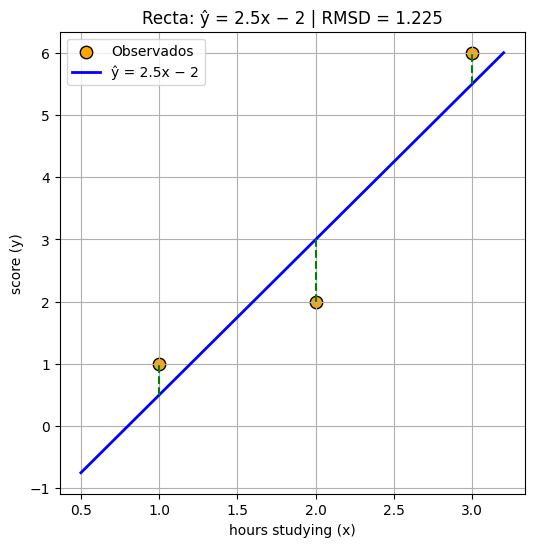

In [32]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# =====================
# Datos de ejemplo
# =====================
x = np.array([1, 2, 3], dtype=float)
y = np.array([1, 2, 6], dtype=float)   # Valores observados

# Recta dada: ŷ = 2.5x - 2
def y_hat(x): 
    return 2.5 * x - 2

y_pred = y_hat(x)
residuals = y - y_pred

# =====================
# Cálculo de RMSD
# =====================
n = len(x)
rss = np.sum(residuals**2)
rmsd = math.sqrt(rss / (n - 2)) if n > 2 else float('nan')

# =====================
# Tabla de resultados
# =====================
df = pd.DataFrame({
    "x": x,
    "y": y,
    "ŷ = 2.5x - 2": y_pred,
    "residuo (y - ŷ)": residuals,
    "(y - ŷ)^2": residuals**2,
})
print(df)
print("\nRSS:", round(rss, 4))
print("RMSD:", round(rmsd, 4))

# =====================
# Gráfica
# =====================
plt.figure(figsize=(6,6))

# Puntos observados
plt.scatter(x, y, color="orange", edgecolor="k", s=80, label="Observados")

# Línea de regresión
x_line = np.linspace(0.5, 3.2, 100)
plt.plot(x_line, y_hat(x_line), "b-", linewidth=2, label="ŷ = 2.5x − 2")

# Residuos (líneas verticales)
for xi, yi, ypi in zip(x, y, y_pred):
    plt.plot([xi, xi], [ypi, yi], "g--")

# Etiquetas
plt.xlabel("hours studying (x)")
plt.ylabel("score (y)")
plt.title(f"Recta: ŷ = 2.5x − 2 | RMSD = {rmsd:.3f}")
plt.grid(True)
plt.legend()

plt.show()


## Regresion lineal

<img src="imagenes\imag4.png" width="800px" height="300px">

<img src="imagenes\imag5.png" width="800px" height="800px">

<img src="imagenes\imag6.png" width="800px" height="800px">

<img src="imagenes\imag7.png" width="800px" height="300px">

<img src="imagenes\explicacion.png" width="800px" height="800px">

<img src="imagenes\intercepto.png" width="800px" height="600px">